## Installation Commands (Required Libraries):

In [2]:
pip install fireducks pandas matplotlib numpy duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 34.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 20.0.0
    Uninstalling pyarrow-20.0.0:
      Successfully uninstalled pyarrow-20.0.0


##Enable Benchmark Mode (FireDucks Special):

In [1]:
import os
os.environ["FIREDUCKS_FLAGS"] = "--benchmark-mode"

##Code to Generate Large Dataset (10 Million Rows):

In [3]:
import pandas as pd
import numpy as np

# Create 10 Million rows
df = pd.DataFrame({
    'user_id': np.random.randint(1, 1_000_000, 10_000_000),
    'amount': np.random.rand(10_000_000) * 1000,  # up to 1000
    'category': np.random.choice(['food', 'tech', 'fashion', 'travel'], 10_000_000),
    'timestamp': pd.date_range(start='2021-01-01', periods=10_000_000, freq='s')
})

# Save to CSV
df.to_csv('large_dataset.csv', index=False)

print("Dataset with 10 Million Rows Generated Successfully!")


Dataset with 10 Million Rows Generated Successfully!


##Basic CSV Read & Filter:

In [4]:
import os
import time

## for Pandas
import pandas as pd
start_time = time.time()
pdf = pd.read_csv('large_dataset.csv')
print(pdf.head())
print("Pandas Read Time:", time.time() - start_time)

## for FireDucks
import fireducks.pandas as fd
start_time = time.time()
fdf = fd.read_csv('large_dataset.csv')
print(fdf.head())
print("FireDucks Read Time:", time.time() - start_time)


   user_id      amount category            timestamp
0   861163  980.991232     food  2021-01-01 00:00:00
1   292043  206.753054  fashion  2021-01-01 00:00:01
2   331434  710.767222     tech  2021-01-01 00:00:02
3   506545  991.120228   travel  2021-01-01 00:00:03
4    35820  747.152859     food  2021-01-01 00:00:04
Pandas Read Time: 7.291675806045532
   user_id      amount category            timestamp
0   861163  980.991232     food  2021-01-01 00:00:00
1   292043  206.753054  fashion  2021-01-01 00:00:01
2   331434  710.767222     tech  2021-01-01 00:00:02
3   506545  991.120228   travel  2021-01-01 00:00:03
4    35820  747.152859     food  2021-01-01 00:00:04
FireDucks Read Time: 0.9654207229614258


##GroupBy Category (Average amount):

In [5]:
## for Pandas
start = time.time()
pdf_grouped = pdf.groupby('category')['amount'].mean().reset_index()
print(pdf_grouped)
print("Pandas GroupBy Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_grouped = fdf.groupby('category')['amount'].mean().reset_index()
print(fdf_grouped)
print("FireDucks GroupBy Time:", time.time() - start)

  category      amount
0  fashion  499.864728
1     food  499.891573
2     tech  500.181180
3   travel  500.048947
Pandas GroupBy Time: 0.6722166538238525
  category      amount
0  fashion  499.864728
1     food  499.891573
2     tech  500.181180
3   travel  500.048947
FireDucks GroupBy Time: 0.041873931884765625



##Filter + GroupBy (amount > 500 → Avg amount per category):

In [6]:
## for Pandas
start = time.time()
pdf_result = pdf[pdf['amount'] > 500].groupby('category')['amount'].mean().reset_index()
print(pdf_result)
print("Pandas Filter + GroupBy Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_result = fdf[fdf['amount'] > 500].groupby('category')['amount'].mean().reset_index()
print(fdf_result)
print("FireDucks Filter + GroupBy Time:", time.time() - start)


  category      amount
0  fashion  749.812238
1     food  749.965448
2     tech  749.950170
3   travel  749.946124
Pandas Filter + GroupBy Time: 0.6942894458770752
  category      amount
0  fashion  749.812238
1     food  749.965448
2     tech  749.950170
3   travel  749.946124
FireDucks Filter + GroupBy Time: 0.24567246437072754


##Sort by amount (Descending):

In [7]:

## for Pandas
start = time.time()
pdf_sorted = pdf.sort_values('amount', ascending=False).groupby('category').head(5)
print(pdf_sorted)
print("Pandas Sort Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_sorted = fdf.sort_values('amount', ascending=False).groupby('category').head(5)
print(fdf_sorted)
print("FireDucks Sort Time:", time.time() - start)



         user_id      amount category            timestamp
6029854   571505  999.999899     tech  2021-03-11 18:57:34
5317249   108674  999.999655     tech  2021-03-03 13:00:49
7618892   998589  999.999616     food  2021-03-30 04:21:32
2299310   928379  999.999509  fashion  2021-01-27 14:41:50
6794348   494296  999.999425     tech  2021-03-20 15:19:08
9277389   152691  999.999366     food  2021-04-18 09:03:09
4037551   793787  999.999327  fashion  2021-02-16 17:32:31
6366488   639874  999.999260     food  2021-03-15 16:28:08
8850054    71195  999.999136     tech  2021-04-13 10:20:54
5337998   799007  999.999125     food  2021-03-03 18:46:38
7586122   497669  999.999052  fashion  2021-03-29 19:15:22
4840923   882388  999.999004  fashion  2021-02-26 00:42:03
3505644   401546  999.998959   travel  2021-02-10 13:47:24
4952752   746158  999.998859     food  2021-02-27 07:45:52
8720606   774068  999.998145     tech  2021-04-11 22:23:26
608309    104379  999.997846   travel  2021-01-08 00:58:

##Count Transactions per Category




In [8]:
# Pandas
start_time = time.time()
pdf_grouped = pdf.groupby('category')['user_id'].count().reset_index()
print(pdf_grouped.head())
print("Pandas Count Time:", time.time() - start_time)

# FireDucks
start_time = time.time()
fdf_grouped = fdf.groupby('category')['user_id'].count().reset_index()
print(fdf_grouped.head())
print("FireDucks Count Time:", time.time() - start_time)

  category  user_id
0  fashion  2501622
1     food  2499370
2     tech  2499877
3   travel  2499131
Pandas Count Time: 0.6319549083709717
  category  user_id
0  fashion  2501622
1     food  2499370
2     tech  2499877
3   travel  2499131
FireDucks Count Time: 0.03932380676269531


##Total Amount per Category


In [9]:
# Pandas
start_time = time.time()
pdf_total = pdf.groupby('category')['amount'].sum().reset_index()
print(pdf_total.head())
print("Pandas Total Amount Time:", time.time() - start_time)

# FireDucks
start_time = time.time()
fdf_total = fdf.groupby('category')['amount'].sum().reset_index()
print(fdf_total.head())
print("FireDucks Total Amount Time:", time.time() - start_time)

  category        amount
0  fashion  1.250473e+09
1     food  1.249414e+09
2     tech  1.250391e+09
3   travel  1.249688e+09
Pandas Total Amount Time: 0.6545534133911133
  category        amount
0  fashion  1.250473e+09
1     food  1.249414e+09
2     tech  1.250391e+09
3   travel  1.249688e+09
FireDucks Total Amount Time: 0.038147926330566406


##Performance Comparison: Pandas vs FireDucks (Bar Chart):

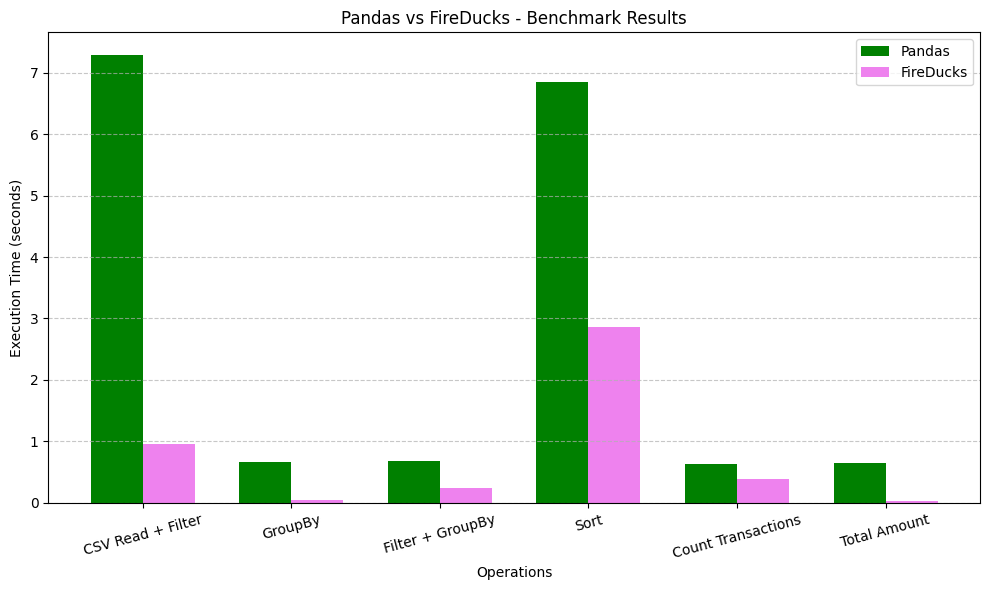

In [11]:
import matplotlib.pyplot as plt

# Operation Names
operations = ['CSV Read + Filter', 'GroupBy', 'Filter + GroupBy', 'Sort', 'Count Transactions', 'Total Amount']

# Execution Times (in seconds)
pandas_times = [7.29, 0.67, 0.69, 6.85, 0.63, 0.65]      # Pandas Times
fireducks_times = [0.96, 0.04, 0.24, 2.86, 0.39, 0.03]     # FireDucks Times

x = range(len(operations))

plt.figure(figsize=(10, 6))
plt.bar(x, pandas_times, width=0.35, label='Pandas', color='green')
plt.bar([i + 0.35 for i in x], fireducks_times, width=0.35, label='FireDucks', color='violet')

plt.xlabel('Operations')
plt.ylabel('Execution Time (seconds)')
plt.title('Pandas vs FireDucks - Benchmark Results')
plt.xticks([i + 0.175 for i in x], operations, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()